### Fitting latent groups in data - Exercises & Answers

### 1. Applied clustering - types of fertility issues
With a clustering algorithm under our belts, lets apply it to a real dataset. We'll investigate whether sub-groups exist in a dataset of females having difficulty conceiving. This might offer some insight into different treatment approaches. 

First, import everything we need. This includes the silhoette score and clustering functionality.

Also import `matplotlib.pyplot as plt` and the `zscore` function from `scipy.stats`. 

In [1]:
# Your answer here
# Import what we need
import pandas as pd # dataframes
import seaborn as sns # plots
import numpy as np # numpy for some functions
import scipy.cluster.hierarchy as shc # clustering
import matplotlib.pyplot as plt # extra plotting functions
from scipy.stats import zscore # Z-score
from sklearn.metrics import silhouette_score

sns.set_theme(style='whitegrid')

Next, read in the data from the following link into a dataframe called `fertility`, showing the top 10 rows: https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Fertility.csv


In [2]:
# Your answer here
fertility = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Fertility.csv')
fertility.head(10)

,rownames,Age,LowAFC,MeanAFC,FSH,E2,MaxE2,MaxDailyGn,TotalGn,Oocytes,Embryos
0,1,40,40,51.5,5.3,45,1427,300.0,2700.0,25,13
1,2,37,41,41.0,7.1,53,802,225.0,1800.0,7,6
2,3,40,38,41.0,4.9,40,4533,450.0,4850.0,27,15
3,4,40,36,37.5,3.9,26,1804,300.0,2700.0,9,4
4,5,30,36,36.0,4.0,49,2526,150.0,1500.0,19,12
5,6,29,35,35.0,3.9,67,3812,150.0,975.0,19,16
6,7,31,24,35.0,3.8,49,1087,262.5,2512.5,13,9
7,8,33,28,34.0,4.3,20,1615,375.0,3075.0,15,9
8,9,36,30,33.0,4.9,60,1879,300.0,4800.0,23,10
9,10,35,32,32.0,3.7,36,2009,225.0,1275.0,26,8


What do these variables mean? The dataset description gives us the following:

- **Age**	Age (in years)
- **LowAFC**	Smallest antral follicle count
- **MeanAFC**	Average antral follicle count
- **FSH**	Maximum follicle stimulating hormone level
- **E2**	Estradiol level
- **MaxE2**	Maximum estradiol level
- **MaxDailyGn**	Maximum daily gonadotropin level
- **TotalGn**	Total gonadotropin level
- **Oocytes**	Number of egg cells
- **Embryos**	Number of embryos

These variables all contribute to the probability of conception in one way or another, and they are all on different scales. We will standardise each variable with Z-scores. Apply the z-score function to all variables EXCEPT the `rownames` column, which you should simply drop, and display the data to check it has all worked.

In [3]:
# Your answer here
# Drop the column
fertility = fertility.drop(columns='rownames')

# Apply the z-score function
fertility = fertility.apply(zscore)

# Show
display(fertility)

,Age,LowAFC,MeanAFC,FSH,E2,MaxE2,MaxDailyGn,TotalGn,Oocytes,Embryos
0,0.994801,4.010100,5.119848,-0.327405,0.246933,-0.152764,-0.093209,-0.095492,2.229576,1.539390
1,0.355286,4.154807,3.704057,0.600475,0.773195,-0.954406,-0.742011,-0.752558,-0.819495,-0.178330
2,0.994801,3.720684,3.704057,-0.533600,-0.081982,3.831078,1.204394,1.474166,2.568361,2.030167
3,0.994801,3.431269,3.232127,-1.049089,-1.002942,0.330787,-0.093209,-0.095492,-0.480709,-0.669108
4,-1.136915,3.431269,3.029871,-0.997540,0.510064,1.256844,-1.390813,-0.971579,1.213219,1.294001
...,...,...,...,...,...,...,...,...,...,...
328,1.421144,-1.488795,-1.554597,5.188323,-1.858119,-1.060864,1.204394,1.875706,-1.158281,-0.669108
329,2.273831,-1.488795,-1.554597,1.786098,1.562590,-0.506769,1.204394,0.890107,-0.819495,-1.159885
330,0.994801,-1.778211,-1.824271,-0.533600,-0.410896,2.601038,0.555593,0.671085,0.535648,-0.423719
331,0.142114,-1.778211,-1.824271,0.084986,0.378498,-0.441355,1.204394,1.766195,0.196862,0.067058


Next, compute the linkage array, which builds the tree. Then, visualise it with a dendrogram.

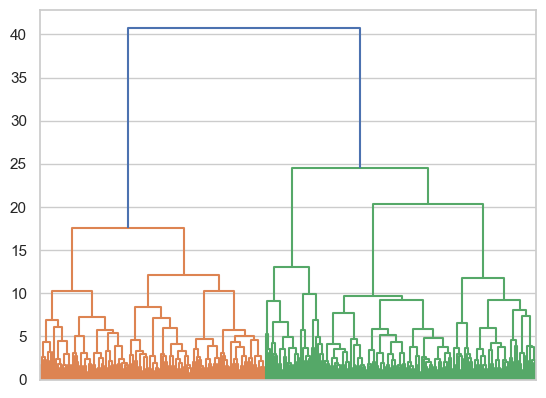

In [4]:
# Your answer here
# Compute tree
tree = shc.linkage(fertility, method='ward')

# Visualise
dendrogram = shc.dendrogram(tree, no_labels=True)

This suggests an the possibility of several cluster arrangements - certainly two (e.g., cut at 25), three, four, or even five. 

Evaluate the silhouette score of the two and three cluster solution by cutting the tree at an appropriate height, recovering the labels, and using the silhouette score function. 

In [5]:
# Your answer here
# Get two and three cuts
cluster_2 = shc.cut_tree(tree, height=25)
cluster_3 = shc.cut_tree(tree, height=23)

# Evaluate 
silhouette_2 = silhouette_score(fertility, cluster_2.flatten())
silhouette_3 = silhouette_score(fertility, cluster_3.flatten())

# Print
display(silhouette_2, silhouette_3)

0.2146644461574779

0.18422376524085038

We should see that the clustering suggests two clusters, but that they are not particularly strong. Put those cluster labels into the dataset, call the column 'cluster'.

In [6]:
# Your answer here
fertility['cluster'] = cluster_2

We will now visualise the clusters to see what the pattern looks like. Reset the dataframe index, then melt the data appropriately so it can be plotted with a barplot. Use `catplot` to separate the plots by cluster.

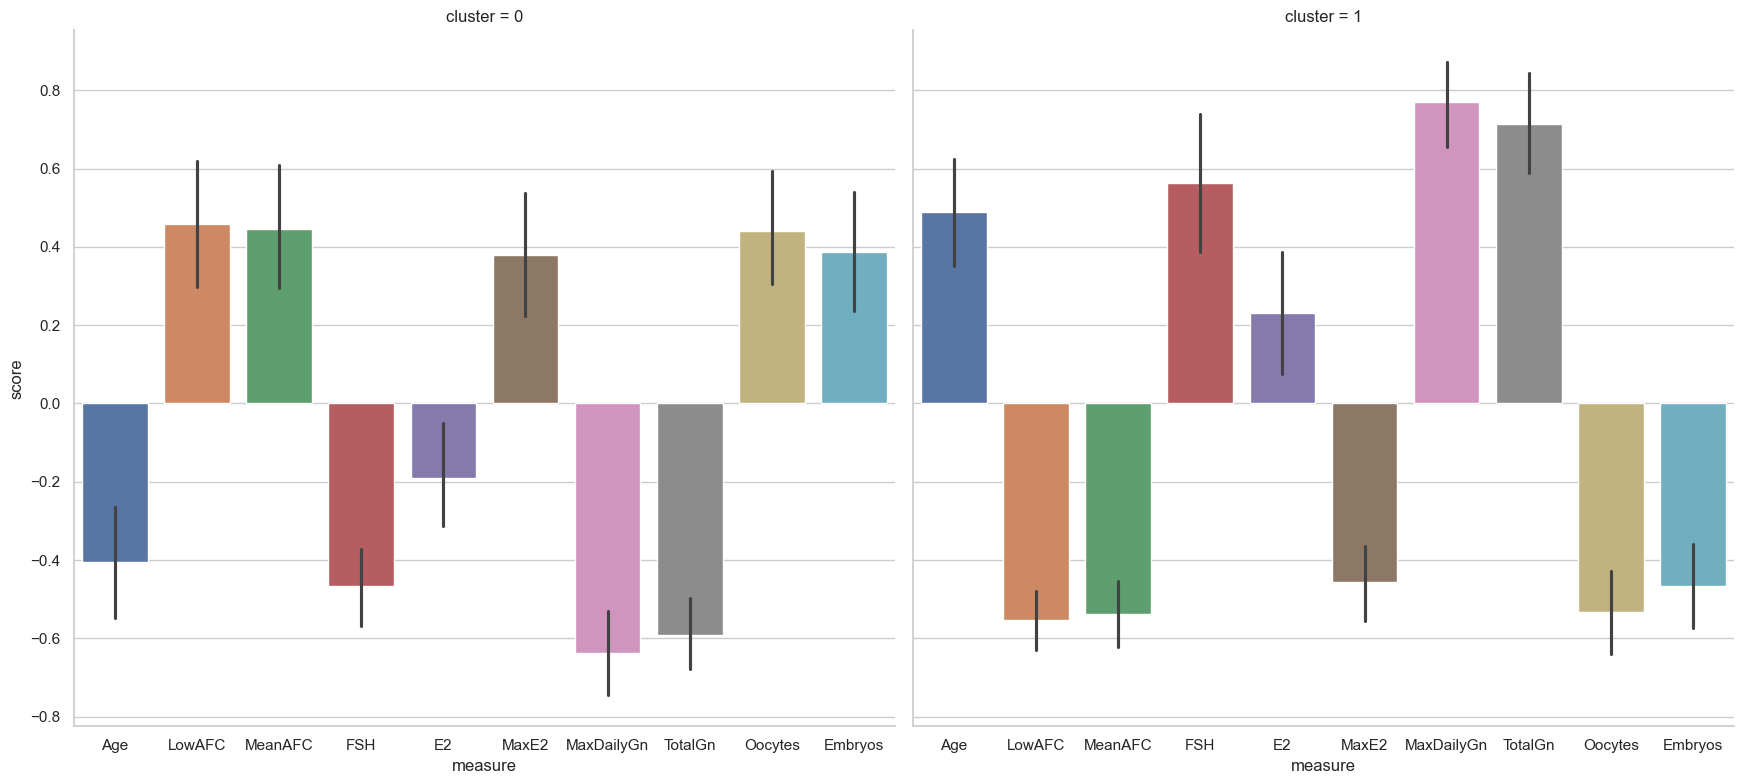

In [7]:
# Your answer here
# Melt the data
plot_this = (fertility
             .reset_index()
             .melt(id_vars=['index', 'cluster'],
                   var_name='measure', 
                   value_name='score')
            )

# Plot
sns.catplot(data=plot_this, 
            aspect=1.1, height=8,
            x='measure', y='score',
            hue='measure',
            col='cluster', kind='bar')

There is a clear pattern in this. 
- Cluster zero contains females who are younger than average, with higher antrical follicle counts but low follice stimulating hormone (FSH) and circulating estradiol. They have low gonadotropin levels and high numbers of oocytes and embryos.
- However, cluster one has females who are essentially the opposite - older, with lower number of embryos and oocytes, and higher levels of gonadotropin and follicular stimulating hormone and estradiol.

These findings would need further replication and investigation but point towards (weaker) subgroups in the data.

### 2. Applied clustering - grouping penguins
We return to another dataset we have seen earlier in the course - the `penguins` dataset. This dataset contains four measurements of three types of penguins, found across three different islands. We will see here if the hierarchical clustering approach can divide the dataset into clusters that resemble the different species. First, we can load the dataset directly from `seaborn`, using its `load_dataset` function - refer to chapter one for a refresher! Load it into a dataframe called `penguins`. Show the top 5 rows.

In [8]:
# Your answer here
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Drop any rows that have NaN in them.

In [9]:
# Your answer here
penguins = penguins.dropna(how='any')

Replace the `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` variables with Z-scored versions.

In [10]:
# Your answer here
variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins[variables] = penguins[variables].apply(zscore)

Build the tree on those z-scored variables, and show the dendrogram.

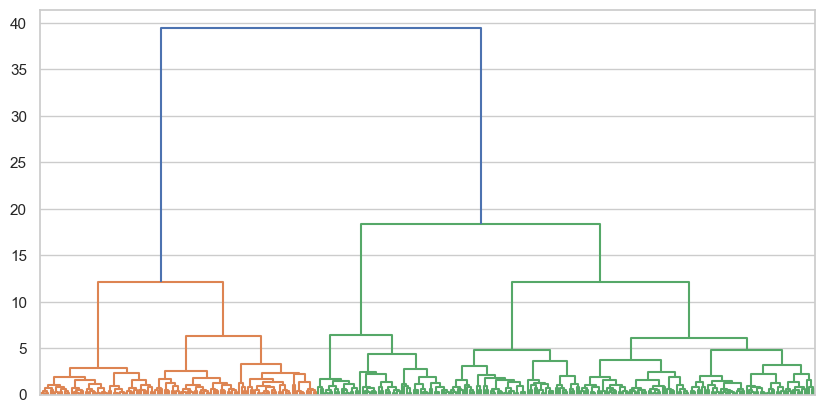

In [11]:
# Your answer here
tree = shc.linkage(penguins[variables], method='ward')

# Show dendrogram
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
dendrogram = shc.dendrogram(tree, no_labels=True, ax=ax)

That is an interesting and very clean clustering solution. A cut at 10 would produce 5 clusters, while 15 would offer 3 clusters. More dramatically a cut at 20 would produce 2. Try those three solutions and assess their silhouette coefficient. 

In [12]:
# Your answer here
# Make cuts
cluster_5 = shc.cut_tree(tree, height=10)
cluster_3 = shc.cut_tree(tree, height=15)
cluster_2 = shc.cut_tree(tree, height=20)

# Silhouette
silhouette_5 = silhouette_score(penguins[variables], cluster_5.flatten())
silhouette_3 = silhouette_score(penguins[variables], cluster_3.flatten())
silhouette_2 = silhouette_score(penguins[variables], cluster_2.flatten())

# Print
display(silhouette_5, silhouette_3, silhouette_2)

0.36144263075820016

0.4520982949638114

0.5308173701641075

These are generally stronger clusters compared to the previous example, as can be seen both from the dendrogram and the silhouette scores. It seems like 2 clusters offer a notably stronger solution, so we will take that, and add it to the dataset.

In [13]:
# Your answer here
penguins['cluster'] = cluster_2

Use `pandas` compute the number of actual penguin species (in the `species` column) that are in the different clusters. 

In [14]:
# Your answer here
pd.crosstab(penguins['species'], penguins['cluster'])

cluster,0,1
species,,
Adelie,146,0
Chinstrap,68,0
Gentoo,0,119


This is about as clean a clustering solution as we'd hope to see in real data. The Adelie and Chinstrap penguins fall in one cluster, while the Gentoo are in another, with perfect separation. To assess this visually, what we will do next is melt the data so we can plot it, and then see what the clusters *and actual species* labels look like. First, reshape the data appropriately, keeping the clusters and species in the right spot and the measures as the variable.

In [15]:
# Your answer here
plot_this = penguins.melt(id_vars=['species', 'island', 'sex', 'cluster'],
                          value_vars=variables,
                          var_name='measure', value_name='score')

Now create a bar plot that has on the x-axis the measure, with separate colours for each *species*.

<Axes: xlabel='measure', ylabel='score'>

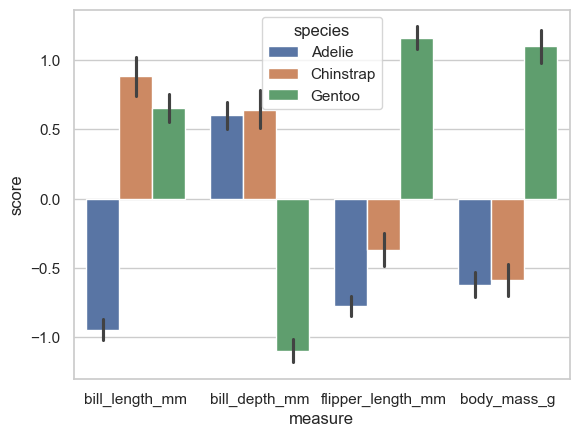

In [16]:
# Your answer here
sns.barplot(data=plot_this, x='measure', y='score', hue='species')

This shows the actual biological pattern. Adelie's have shorter bills than Chinstrap and Gentoo penguins, but on the rest of the variables, the Gentoo's are very dissimilar. Now create a bar plot that illustrates the *clusters* in the same way.

<Axes: xlabel='measure', ylabel='score'>

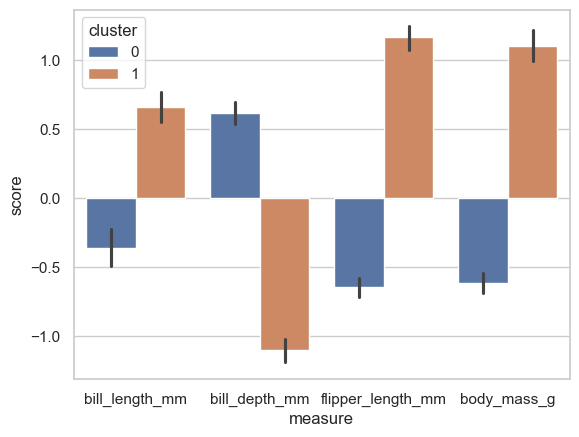

In [17]:
# Your answer here
sns.barplot(data=plot_this, x='measure', y='score', hue='cluster')

From this its hopefully clear that the clustering algorithm has noticed the Gentoo penguins are so different on the other variables and has considered them to be a 'different sort' of penguin - the pattern closely resembles the actual biological speciation! 

### Applied clustering - combining EFA and clustering
We turn now to a more advanced task, but one that in practice is often used and is very powerful. So far, we have used clustering on datasets with a relatively small number of variables (i.e., columns) of no more than 10 variables. One interesting mathematical issue is that as the number of variables increases, clusters become harder and harder to find due to the *curse of dimensionality* - each observation is almost equally far away from other points when there are many, many variables. 

Fortunately we can solve this problem easily. We already know how. EFA allows us to reduce a large number of variables (e.g. scores on individual personality questions etc) to a smaller set, keeping a portion of the variance in the dataset. Carrying out clustering on the latent variables themselves and not the observed variables can offer some really interesting insights into a dataset. Here, we will use this approach to figure out if there are a set of 'personality profiles' in a Big 5 dataset we have seen before!

We will read in some raw Big 5 questionnaire data from this link: https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv

We've seen this before - read it in, and drop any missing data.

In [18]:
# Your answer here
bfi = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv').dropna(how='any')
bfi.head()

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,61623,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
7,61629,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
10,61634,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
14,61640,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
22,61661,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


Now select only the questions that are relevant to the questionnaire - e.g. columns like 'A1', 'N5', etc. There should be 25 of those.

In [19]:
# Your answer here
bfi = bfi.filter(regex='[A-Z]\d')

We *could* cluster this, but it would likely be suboptimal. So first, we will conduct an EFA to reduce the 25 variables to 5 latent factors. Do this below, importing what you need to conduct it. Check the amount of variance retained also.

In [20]:
# Your answer here
# Import factor analyzer
from factor_analyzer import FactorAnalyzer

# Fit the model
efa = FactorAnalyzer(n_factors=5).fit(bfi)

# Get variances
efa.get_factor_variance()

(array([2.71289544, 2.5194412 , 2.02988607, 1.57809897, 1.48183355]),
 array([0.10851582, 0.10077765, 0.08119544, 0.06312396, 0.05927334]),
 array([0.10851582, 0.20929347, 0.29048891, 0.35361287, 0.41288621]))

Check the loadings matrix and plot them, to confirm this is a good solution.

<Axes: >

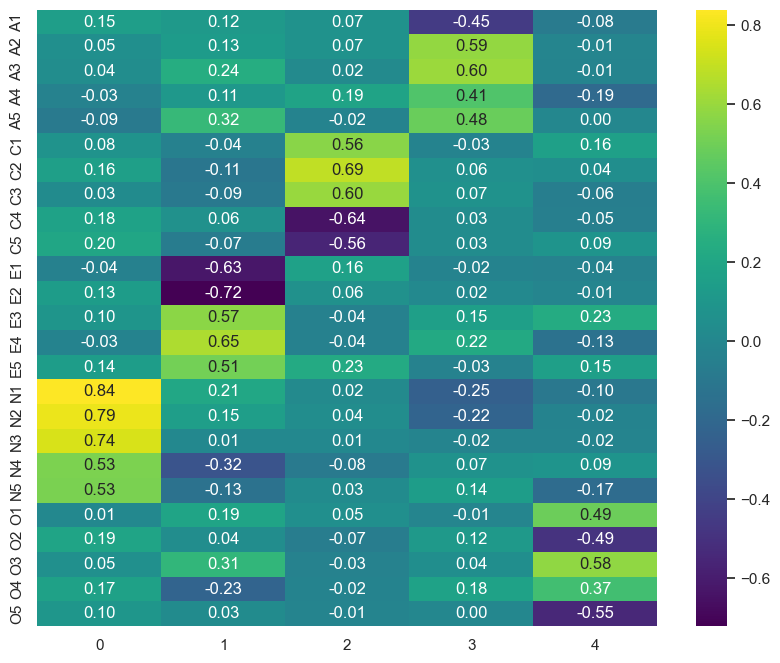

In [21]:
# Your answer here
loadings = pd.DataFrame(efa.loadings_,
                        index=bfi.columns)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(loadings, cmap='viridis', annot=True, fmt='.2f', ax=ax)

This does indeed look like a solid representation of the Big 5 - factor 0 is Neuroticism, factor 1 is Extraversion, factor 2 is Conscientiousness, factor 3 is Agreeableness, and factor 4 is Openness. Next, create a dataframe that has the latent scores of each participant on each factor (refer to chapter 8 for a refresher!), giving the column names in that order (N, E, C, A, O).

In [22]:
# Your answer here
five = pd.DataFrame(
    efa.transform(bfi),
    columns=['N', 'E', 'A', 'C', 'O'])

five.head()

,N,E,A,C,O
0,0.026466,1.243956,1.425221,0.150861,0.400030
1,0.578565,-1.826086,-1.283536,-2.161121,-0.574579
2,-0.166427,0.199434,-0.180815,-0.103906,-0.348037
3,-0.493933,-0.093299,0.545031,-1.640684,-0.285600
4,-0.869514,0.190820,-1.337956,0.637378,0.304959


Now we have represented a large dataset of 25 variables as a set with five. Our next step is to cluster *those* values with our usual tree approach. Do that below, building the linkage tree and showing the dendrogram. This will essentially find groups of people with different personality profiles, which is an interesting finding.

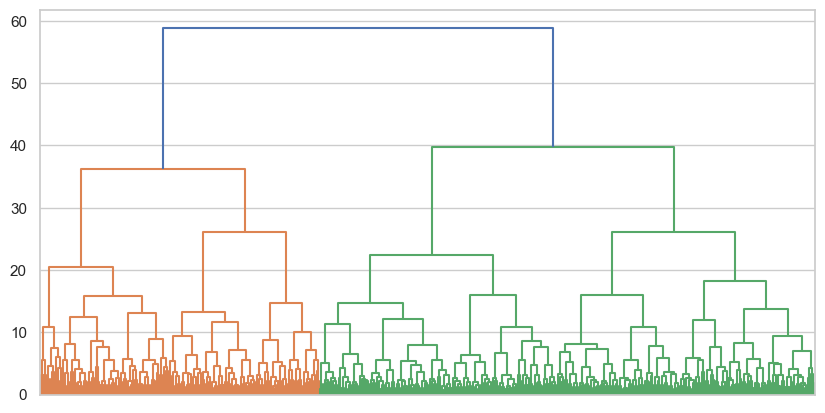

In [23]:
# Your answer here
tree = shc.linkage(five, method='ward')

# Show
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
dendrogram = shc.dendrogram(tree, no_labels=True, ax=ax)

An interesting result - again one imagine cuts at various areas (30 for four clusters, 38 for three, 42 for two), but arelatively clear pattern has emerged. Test the cluster results for four, three, and two clusters, and show their silhouette coefficients.

In [24]:
# Your answer here
# Make cuts
cluster_2 = shc.cut_tree(tree, height=41)
cluster_3 = shc.cut_tree(tree, height=38)
cluster_4 = shc.cut_tree(tree, height=30)

# Silhouette
silhouette_2 = silhouette_score(five, cluster_2.flatten())
silhouette_3 = silhouette_score(five, cluster_3.flatten())
silhouette_4 = silhouette_score(five, cluster_4.flatten())

# Print
display(silhouette_2, silhouette_3, silhouette_4)

0.19988331032320203

0.11861979499537914

0.12536850355775894

Two clusters seems to be a good bet here again, though the strength is rather weak - this suggests there are not particularly strong clusters of personality profiles in the data. Nonetheless, let us melt the data and examine the two groups, after adding the clusters to the dataset. Visualise them with a bar chart as before.

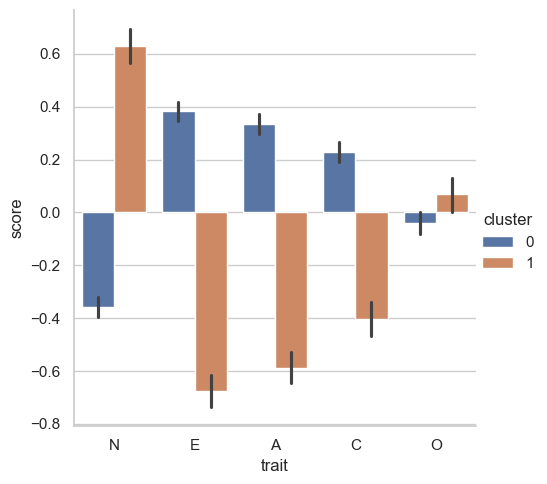

In [25]:
# Your answer here
# Add cluster labels
five['cluster'] = cluster_2

# Melt
plot_this = five.reset_index().melt(id_vars=['index', 'cluster'],
                                    var_name='trait', value_name='score')

# Visualise
sns.catplot(data=plot_this,
            x='trait', y='score', 
            hue='cluster', kind='bar')

Cluster 0 are relaxed, outgoing, friendly, and conscientious. Conversely, cluster 1 are neurotic, introverted, unfriendly, and not very conscientious! Remember though, clustering is a *descriptive* technique. It is not an inferential model like OLS or factor analysis of any form, and so its findings can be very dataset specific - it is a powerful way to explore data, and we have touched only one approach to clustering here. There are in fact model-based clustering approaches that use probability distributions which can be more inferentially robust, but they too come with their own drawbacks. Taken together though, clustering is a very useful tool to have, as long as it is treated with respect.